<a href="https://colab.research.google.com/github/taceroc/DSPS_TAcero/blob/main/hw5/hw5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/fedhere/DSPS_FBianco/master/HW5/hbl2017.csv")

In [3]:
data.head()

,#ID,x,y,σy,σx,ρxy
0,1,201,592,61,9,-0.84
1,2,244,401,25,4,0.31
2,3,47,583,38,11,0.64
3,4,287,402,15,7,-0.27
4,5,203,495,21,5,-0.33


In [4]:
# -- select columns that I need
data_new = data.copy()[4:][["#ID", "x", "y", "σy"]]

In [5]:
data_new.head()

,#ID,x,y,σy
4,5,203,495,21
5,6,58,173,15
6,7,210,479,27
7,8,202,504,14
8,9,198,510,30


Text(0, 0.5, 'y')

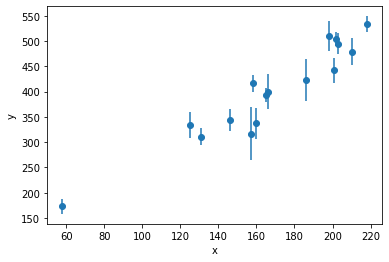

In [6]:
# -- plot to see
plt.errorbar(data_new["x"], data_new["y"], yerr = data_new["σy"], fmt = "o")
plt.xlabel("x")
plt.ylabel("y")

In [7]:
# -- extract the data as np arrays
xx = data_new["x"].to_numpy()
yy = data_new["y"].to_numpy()
xx

array([203,  58, 210, 202, 198, 158, 165, 201, 157, 131, 166, 160, 186,
       125, 218, 146])

In [8]:
# -- define matrix A that is one column full of 1s and another corresponding to the x values
AA = np.array([[1,i] for i in xx])
AA

array([[  1, 203],
       [  1,  58],
       [  1, 210],
       [  1, 202],
       [  1, 198],
       [  1, 158],
       [  1, 165],
       [  1, 201],
       [  1, 157],
       [  1, 131],
       [  1, 166],
       [  1, 160],
       [  1, 186],
       [  1, 125],
       [  1, 218],
       [  1, 146]])

In [9]:
# -- define matrix Y that is one column of the y values
YY = np.array([[i] for i in yy])
YY

array([[495],
       [173],
       [479],
       [504],
       [510],
       [416],
       [393],
       [442],
       [317],
       [311],
       [400],
       [337],
       [423],
       [334],
       [533],
       [344]])

In [10]:
# -- define C that is a diagaonal matrix of the square of the sigmay
CC = np.zeros((len(data_new),len(data_new)))
np.fill_diagonal(CC, data_new["σy"]**2)

In [11]:
# -- [A^T C^-1 A]^-1
one_part = AA.transpose().dot(np.linalg.inv(CC).dot(AA))

In [12]:
# -- [A^T C^-1 Y]
second_part = AA.transpose().dot(np.linalg.inv(CC).dot(YY))

In [13]:
rr = np.linalg.inv(one_part).dot(second_part)

Text(0, 0.5, 'y')

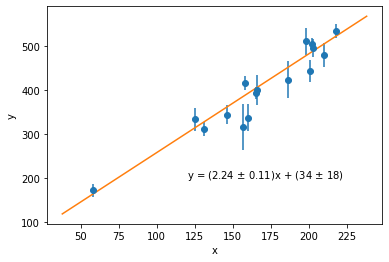

In [14]:
x = np.linspace(min(xx) - 20,max(xx) + 20,10)
# -- square root of the diagonal of the [A^TC^-1A]^-1 that is the covariance matrix
sigmas = np.sqrt(np.diag(np.linalg.inv(one_part)))
plt.errorbar(data_new["x"], data_new["y"], yerr = data_new["σy"], fmt = "o")
plt.plot(x, rr[1]*x+rr[0])
plt.text(120, 200, "y = ({:.2f} $\pm$ {:.2f})x + ({:.0f} $\pm$ {:.0f})".format(rr[1][0], sigmas[1], rr[0][0], sigmas[0]))
plt.xlabel("x")
plt.ylabel("y")

### Figure: Partial data from file with the respetive error bar for each point. In orange is the line fitted follwing the algebraic procediment. The uncertainity of the slop and for the intersection point came from the covariance matrix, that is $[\mathbf{A}^T\mathbf{C}^{-1}\mathbf{A}]^{-1}$. 
### The values are the square root of the diagonal.

In [15]:
# -- put all the line above in a function
def line_fit(df):
  xx = df["x"].to_numpy()
  yy = df["y"].to_numpy()
  AA = np.array([[1,i] for i in xx])
  YY = np.array([[i] for i in yy])
  CC = np.zeros((len(df),len(df)))
  np.fill_diagonal(CC, df["σy"]**2)
  one_part = AA.transpose().dot(np.linalg.inv(CC).dot(AA))
  sigmas = np.sqrt(np.diag(np.linalg.inv(one_part)))
  second_part = AA.transpose().dot(np.linalg.inv(CC).dot(YY))
  rr = np.linalg.inv(one_part).dot(second_part)

  return rr, sigmas

## Exercise 2:

In [16]:
data = data[["#ID", "x", "y", "σy"]]
rr_full, sigmas_full = line_fit(data)

Text(0, 0.5, 'y')

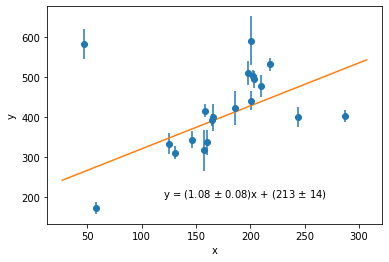

In [17]:
x = np.linspace(min(data["x"]) - 20,max(data["x"]) + 20,10)
# -- square root of the diagonal of the [A^TC^-1A]^-1 that is the covariance matrix
plt.errorbar(data["x"], data["y"], yerr = data["σy"], fmt = "o")
plt.plot(x, rr_full[1]*x+rr_full[0])
plt.text(120, 200, r"y = ({:.2f} $\pm$ {:.2f})x + ({:.0f} $\pm$ {:.0f})".format(rr_full[1][0], sigmas_full[1], 
                                                                                rr_full[0][0], sigmas_full[0]))
plt.xlabel("x")
plt.ylabel("y")

### Figure: All data from file with the respetive error bar for each point. In orange is the line fitted follwing the algebraic procediment. 

## Exercise 3:

In [18]:
# -- add the quadratic term
def line_fitqq(df):
  xx = df["x"].to_numpy()
  yy = df["y"].to_numpy()
  xxx = df["x"].to_numpy()**2
  AA = np.array([[1,xx[i],xxx[i]] for i in range(len(xx))])
  YY = np.array([[i] for i in yy])
  CC = np.zeros((len(df),len(df)))
  np.fill_diagonal(CC, df["σy"]**2)
  one_part = AA.transpose().dot(np.linalg.inv(CC).dot(AA))
  sigmas = np.sqrt(np.diag(np.linalg.inv(one_part)))
  second_part = AA.transpose().dot(np.linalg.inv(CC).dot(YY))
  rr = np.linalg.inv(one_part).dot(second_part)

  return rr, sigmas

In [19]:
rr_fullqq, sigmas_fullqq = line_fitqq(data_new)
rr_fullqq[2]

array([0.00229889])

Text(0, 0.5, 'y')

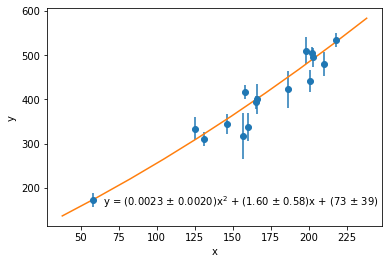

In [20]:
x = np.linspace(min(data_new["x"]) - 20,max(data_new["x"]) + 20,10)
# -- square root of the diagonal of the [A^TC^-1A]^-1 that is the covariance matrix
plt.errorbar(data_new["x"], data_new["y"], yerr = data_new["σy"], fmt = "o")
plt.plot(x, rr_fullqq[2]*x**2 + rr_fullqq[1]*x+rr_fullqq[0])
plt.text(65, 160, r"y = ({:.4f} $\pm$ {:.4f})x$^2$ + ({:.2f} $\pm$ {:.2f})x + ({:.0f} $\pm$ {:.0f})".format(rr_fullqq[2][0], sigmas_fullqq[2],
                                                                                                           rr_fullqq[1][0], sigmas_fullqq[1], 
                                                                                rr_fullqq[0][0], sigmas_fullqq[0]))
plt.xlabel("x")
plt.ylabel("y")

### Figure: Partial data from file with the respetive error bar for each point. In orange is the polynom fitted follwing the algebraic procediment. The fit was done the same as for the linear fit, but, in this case, a quadratic term was added.

## Exercise 4:
Imagine a set of $N$ measurements $t_i$, with uncertainty variances $\sigma^2_{t_i}$, all of the same (unknown) quantity $T$ . Assuming the generative model that each $t_i$ differs from $T$ by a Gaussian-distributed offset, taken from a Gaussian with zero mean and variance $\sigma^2_{t_i}$, write down an expression for the log likelihood $\ln L$ for the data given the model parameter $T$ . Take a derivative and show that the maximum likelihood value for $T$ is the usual weighted mean.


\begin{align}
  &\sigma_{t_i}^2 = T\\
  &\text{The likelihood function is the product of the distribution that describe each data point, in this case, the product of gaussians distributions:}\\
  &L = p({t_i}| \mu, T) = \prod_{i=1}^N \frac{1}{\sqrt{2\pi T}}\exp\left(-\frac{(t_i - \mu)^2}{2T}\right).\\
  &\text{Take the log to both sides, and use properties of the log}\\
  &\ln(L(\mu, T)) = \sum_{i=1}^N \ln\left(\frac{1}{\sqrt{2\pi T}}\right) - \sum_{i=1}^N \frac{(t_i - \mu)^2}{2T},\\
  &\ln(L(\mu, T)) = -\frac{N}{2}\ln(2\pi T) - \frac{1}{2T}\sum_{i=1}^N (t_i - \mu)^2,\\
  &\text{The maximum of the likelihood is the derivative with respect to T and equal to zero}\\
  &\frac{d\ln(L(\mu, T))}{dT} = 0\\
  &\frac{d\ln(L(\mu, T))}{dT} =-\frac{N}{2T}+  \frac{1}{2T^2}\sum_{i=1}^N (t_i - \mu)^2 = 0\\
  &\frac{1}{T}\sum_{i=1}^N (t_i-\mu)^2 = N\\
  &T = \frac{1}{N}\sum_{i=1}^N(t_i-\mu)^2 
\end{align}

